In [1]:
import matplotlib.pyplot as mpl
# mpl.use('Qt5Agg')

from nilearn.datasets import fetch_atlas_basc_multiscale_2015
from modl.input_data.fmri.fixes import monkey_patch_nifti_image

monkey_patch_nifti_image()

import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.model_selection import train_test_split

from modl.datasets import fetch_adhd
from modl.decomposition.fmri import fMRIDictFact, rfMRIDictionaryScorer
from modl.plotting.fmri import display_maps
from modl.utils.system import get_cache_dirs

import ibc_public
import os
import glob
import nibabel as nib

/home/sshankar/env/modl/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
n_components = 20
batch_size = 50
learning_rate = .92
method = 'masked'
step_size = 0.01
reduction = 12
alpha = 1e-3
n_epochs = 2
verbose = 15
n_jobs = 2
smoothing_fwhm = 6

In [3]:
dict_init = fetch_atlas_basc_multiscale_2015()['scale444']

In [ ]:
from nilearn import image
di = image.load_img(dict_init)
di.shape

In [ ]:
dict_init

In [4]:
_package_directory = os.path.dirname(os.path.abspath(ibc_public.__file__))
mask = nib.load(os.path.join(_package_directory, '../ibc_data', 'gm_mask_3mm.nii.gz'))

memory = Memory(cachedir=get_cache_dirs()[0], verbose=2)


/home/sshankar/env/modl/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/sshankar/cache'", use "location='/home/sshankar/cache'" instead.
  after removing the cwd from sys.path.


In [5]:
######
# This bit is for testing the script with 
# one run per subject
######

# Now create a list of movie session files 
movie_dir = '/home/sshankar/raiders/3mm/'
subs = sorted(os.listdir(movie_dir))

movie_arrays = []

# Create 2D masked arrays from image data and save to file for quick and easy access
for s, sub in enumerate(subs):
    if os.path.isdir(os.path.join(movie_dir, sub)):
        sub_arrays = []
        sess = sorted(os.listdir(os.path.join(movie_dir, sub)))
        ses = sess[21]
        if os.path.isdir(os.path.join(movie_dir, sub, ses)):
            movie_imgs = sorted(glob.glob(os.path.join(movie_dir, sub, ses, '*.nii.gz')))
            mi = 0
            sub_arrays.append(movie_imgs[mi])
        movie_arrays.append(sub_arrays)

In [ ]:
######
# This bit is for when the script is working fine
######

# Now create a list of movie session files 
movie_dir = '/home/sshankar/raiders/3mm/'
subs = sorted(os.listdir(movie_dir))

movie_arrays = []

# Create 2D masked arrays from image data and save to file for quick and easy access
for s, sub in enumerate(subs):
    if os.path.isdir(os.path.join(movie_dir, sub)):
        sub_arrays = []
        sess = sorted(os.listdir(os.path.join(movie_dir, sub)))
        for i, ses in enumerate(sess):
            if os.path.isdir(os.path.join(movie_dir, sub, ses)):
                movie_imgs = sorted(glob.glob(os.path.join(movie_dir, sub, ses, '*.nii.gz')))
                for mi in range(len(movie_imgs)):
                    sub_arrays.append(movie_imgs[mi])
        movie_arrays.append(sub_arrays)

In [ ]:
movie_arrays

In [6]:
import pandas as pd
mov_df = pd.DataFrame(data=movie_arrays).values

In [ ]:
mov_df

In [ ]:
type(mov_df)

In [ ]:
train_data, test_data = train_test_split(mov_df, test_size=1, random_state=0)
train_imgs = zip(*train_data)
test_imgs = zip(*test_data)
mask = mask
memory = Memory(cachedir=get_cache_dirs()[0],
                verbose=2)

In [ ]:
cb = rfMRIDictionaryScorer(test_imgs)

In [7]:
dict_fact = fMRIDictFact(smoothing_fwhm=smoothing_fwhm,
                         standardize=True,
                         high_pass=1./128,
                         t_r=2.0,
                         method=method,
                         step_size=step_size,
                         mask=mask,
                         memory=memory,
                         memory_level=2,
                         verbose=verbose,
                         n_epochs=n_epochs,
                         n_jobs=n_jobs,
                         random_state=1,
                         n_components=n_components,
                         dict_init=dict_init,
                         positive=True,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         reduction=reduction,
                         alpha=alpha,
                         )

In [8]:
files_ = tuple([x[0] for x in mov_df])
files_

('/home/sshankar/raiders/3mm/sub-01/ses-01/wrdcsub-01_ses-16_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-04/ses-01/wrdcsub-04_ses-13_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-05/ses-01/wrdcsub-05_ses-13_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-06/ses-01/wrdcsub-06_ses-13_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-07/ses-01/wrdcsub-07_ses-14_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-09/ses-01/wrdcsub-09_ses-14_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-11/ses-01/wrdcsub-11_ses-14_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-12/ses-01/wrdcsub-12_ses-14_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-13/ses-01/wrdcsub-13_ses-13_task-Raiders_acq-ap_run-04_bold.nii.gz',
 '/home/sshankar/raiders/3mm/sub-14/ses-01/wrdcsub-14_ses-14_task-Raiders_acq-ap_r

In [ ]:
type(files_)

In [ ]:
tuple(movie_arrays)

In [9]:
dict_fact.fit(files_)

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Memory]27.3s, 0.5min   : Loading resample_img...
[Memory]27.4s, 0.5min   : Loading unmask...
[Memory]27.4s, 0.5min   : Loading _compute_components...
[Memory]27.4s, 0.5min   : Loading unmask...


fMRIDictFact(alpha=0.001, batch_size=50, callback=None, detrend=True,
             dict_init='/home/sshankar/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale444.nii.gz',
             high_pass=0.0078125, learning_rate=0.92, low_pass=None,
             mask=<modl.input_data.fmri.fixes.Nifti1Image object at 0x7ff1d6171978>,
             mask_args=None, mask_strategy='background',
             memory=Memory(location=/home/sshankar/cache/joblib),
             memory_level=2, method='masked', n_components=20, n_epochs=2,
             n_jobs=2, positive=True, random_state=1, reduction=12,
             smoothing_fwhm=6, standardize=True, step_size=0.01, t_r=2.0,
             target_affine=None, target_shape=None, transform_batch_size=None,
             verbose=15)

In [13]:
os.getcwd()

'/home/sshankar/IBC_scripts'

In [19]:
ica_xform = dict_fact.transform(files_)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.7s finished


In [18]:
dict_fact.transform(files_)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   10.5s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:   19.3s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   19.4s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:   28.8s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:   28.9s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:   38.5s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:   38.6s remaining:    9.7s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   47.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   47.6s finished


[array([[-3.70052528e+00],
        [-4.59110291e+02],
        [-6.50532227e+01],
        [ 1.01396416e+02],
        [-7.77689743e+01],
        [-3.76920410e+02],
        [-3.40395538e+02],
        [-8.20861435e+01],
        [ 2.52643082e+02],
        [ 1.52213394e+02],
        [ 1.42397720e+02],
        [-1.27905169e+01],
        [ 4.37704102e+02],
        [ 5.43931335e+02],
        [ 1.85480366e+01],
        [-3.50943420e+02],
        [-5.78900024e+02],
        [-2.99243958e+02],
        [-1.19431396e+02],
        [-3.37958130e+02],
        [-4.94916199e+02],
        [-5.31620850e+02],
        [-4.13094971e+02],
        [-2.54277924e+02],
        [-3.33541145e+01],
        [-6.28495293e+01],
        [ 1.32896301e+02],
        [ 4.57471497e+02],
        [ 6.04115601e+02],
        [ 2.50525894e+02],
        [ 1.22686546e+02],
        [ 2.44652237e+02],
        [ 2.69415558e+02],
        [ 1.78853363e+02],
        [-1.09346825e+02],
        [-1.88355225e+02],
        [ 5.98939934e+01],
 

In [20]:
dict_fact.components_img_.shape

(53, 63, 52, 1)

/home/sshankar/env/modl/lib/python3.6/site-packages/nilearn/plotting/displays.py:98: UserWarning: linewidths is ignored by contourf
  **kwargs)


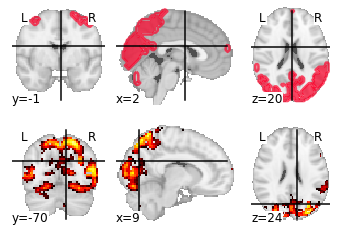

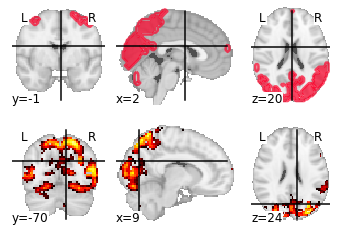

In [25]:
display_maps(plt.figure(), dict_fact.components_img_)

In [26]:
dict_fact.components_.shape

(1, 46448)

In [27]:
dict_fact.n_components

20

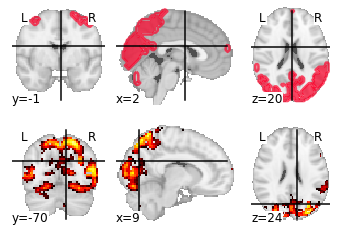

In [29]:
fig = plt.figure()
display_maps(fig, dict_fact.components_img_)
plt.show()